In [1]:
# !pip3 install pandas
# !pip3 install tensorflow
# !pip3 install matplotlib
# !pip3 install io
# !pip3 install sklearn

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#Cargo los datos para entrenar
train_data = pd.read_csv('/home/usr_1ctdiazfranciscojavier_gmail/Data.txt',sep=';',encoding='latin-1', decimal=",")

#Muestro las 5 primeras filas para comprobar que se ha cargado correctamente
train_data.head()

,Calle,Localización,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Construcción viviendas pública,Propietario,Alarma,Ocupada
0,C/ Julio,San Blas-Canillejas,161672,11006.0,418.0,0.002585,4815,13404.0,22288.0,1.0,Particular,1,0
1,C/ Gil De Santivañes,Salamanca,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0,0.0,Particular,1,0
2,C/ Avenida Reina Victoria,Chamberí,141397,5984.0,258.0,0.001825,9040,22499.0,17164.0,0.0,Banco,1,0
3,C/ Alan Turing,Villa de Vallecas,114832,8744.0,334.0,0.002909,4945,11925.0,15546.0,116.0,Particular,1,0
4,C/ Cid,Salamanca,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0,0.0,Banco,1,0


In [5]:
df_majority = train_data[train_data.Ocupada==0]
df_minority = train_data[train_data.Ocupada==1]

In [6]:
df_majority

,Calle,Localización,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Construcción viviendas pública,Propietario,Alarma,Ocupada
0,C/ Julio,San Blas-Canillejas,161672,11006.0,418.0,0.002585,4815,13404.0,22288.0,1.0,Particular,1,0
1,C/ Gil De Santivañes,Salamanca,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0,0.0,Particular,1,0
2,C/ Avenida Reina Victoria,Chamberí,141397,5984.0,258.0,0.001825,9040,22499.0,17164.0,0.0,Banco,1,0
3,C/ Alan Turing,Villa de Vallecas,114832,8744.0,334.0,0.002909,4945,11925.0,15546.0,116.0,Particular,1,0
4,C/ Cid,Salamanca,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0,0.0,Banco,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,C/ Mijas,Puente de Vallecas,241666,22125.0,1102.0,0.004560,12270,9545.0,47844.0,100.0,Banco,1,0
99996,C/ Orden,Tetuán,161991,10341.0,520.0,0.003210,9120,14970.0,32597.0,5.0,Banco,1,0
99997,C/ Tavira,Carabanchel,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0,37.0,Banco,1,0
99998,C/ Ventosa,Arganzuela,156176,8367.0,296.0,0.001895,6725,17306.0,16447.0,1.0,Banco,1,0


In [7]:
# Realizo un upsampling de los datos que están ocupados para que estén balanceados los datos de ocupados y no ocupados
df_minority_upsampled = resample(df_minority,
                                 replace = True,
                                 n_samples=96900,
                                 random_state=123)

In [8]:
df_minority_upsampled

,Calle,Localización,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Construcción viviendas pública,Propietario,Alarma,Ocupada
48680,C/ Arte Hiperrealista,Villa de Vallecas,114832,8744.0,334.0,0.002909,4945,11925.0,15546.0,116.0,Particular,0,1
41824,C/ Diario La Nacion,Carabanchel,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0,37.0,Banco,0,1
62563,C/ Jose Bardosano Baos,Chamartín,148039,5808.0,316.0,0.002135,7235,25969.0,14927.0,0.0,Banco,0,1
73909,C/ Cigoitia,San Blas-Canillejas,161672,11006.0,418.0,0.002585,4815,13404.0,22288.0,1.0,Banco,0,1
42490,C/ Matillas,Villa de Vallecas,114832,8744.0,334.0,0.002909,4945,11925.0,15546.0,116.0,Banco,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60559,C/ Orellana,Hortaleza,193833,9826.0,226.0,0.001166,5110,18277.0,21309.0,4.0,Particular,0,1
21442,C/ Sancho Panza,Puente de Vallecas,241666,22125.0,1102.0,0.004560,12270,9545.0,47844.0,100.0,Ayuntamiento,0,1
97486,C/ Eugenio Salazar,Chamartín,148039,5808.0,316.0,0.002135,7235,25969.0,14927.0,0.0,Ayuntamiento,0,1
44973,C/ Avenida Princesa Juana De Austria Del Km 52...,Villaverde,154915,14037.0,414.0,0.002672,6470,9756.0,32953.0,20.0,Banco,0,1


In [9]:
train_data=pd.concat([df_majority, df_minority_upsampled])

In [10]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [11]:
train_data = train_data.head(100000)

In [12]:
#Escojo la variable a predecir
train_labels = train_data['Ocupada']

In [13]:
#Selecciono las variables importantes para predecir
columns_to_extract = ['Calle','Localización',	'Habitantes','Paro_registrado','N_detenciones',
                      'Detenciones/Habitantes','Viviendas vacías','Renta media por persona',
                      'N_extranjeros','Propietario',
                      'Alarma']

In [14]:
#Creo un dataframe con las variables con las que voy a predecir
train_features = train_data[columns_to_extract]

In [15]:
#Muestro las 5 primeras filas por pantalla
train_features.head()

,Calle,Localización,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Propietario,Alarma
0,C/ Plaza Pontejos,Centro,140991,10227.0,1936.0,0.013731,11200,16147.0,34224.0,Banco,0
1,C/ Paseo Puerta Del Angel,Moncloa-Aravaca,122164,5227.0,281.0,0.002300,4725,22152.0,13796.0,Banco,1
2,C/ Muller,Tetuán,161991,10341.0,520.0,0.003210,9120,14970.0,32597.0,Particular,1
3,C/ Plaza Angel,Centro,140991,10227.0,1936.0,0.013731,11200,16147.0,34224.0,Banco,0
4,C/ Alaterno,Chamartín,148039,5808.0,316.0,0.002135,7235,25969.0,14927.0,Banco,0


In [16]:
# Voy a coger por separado las variables numéricas y las categóricas para tratarlas más fácilmente
# Creo el dataframe de las variables numéricas -->  var_num
var = ['Habitantes','Paro_registrado','N_detenciones',
       'Detenciones/Habitantes','Viviendas vacías','Renta media por persona',
       'N_extranjeros']
var_num=train_features[var]
var_num.head()

,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros
0,140991,10227.0,1936.0,0.013731,11200,16147.0,34224.0
1,122164,5227.0,281.0,0.002300,4725,22152.0,13796.0
2,161991,10341.0,520.0,0.003210,9120,14970.0,32597.0
3,140991,10227.0,1936.0,0.013731,11200,16147.0,34224.0
4,148039,5808.0,316.0,0.002135,7235,25969.0,14927.0


In [17]:
# Creo el dataframe de las variables categóricas -->  var_cat
var2 = ['Calle','Localización','Propietario','Alarma']
var_cat=train_features[var2]
var_cat.head()

,Calle,Localización,Propietario,Alarma
0,C/ Plaza Pontejos,Centro,Banco,0
1,C/ Paseo Puerta Del Angel,Moncloa-Aravaca,Banco,1
2,C/ Muller,Tetuán,Particular,1
3,C/ Plaza Angel,Centro,Banco,0
4,C/ Alaterno,Chamartín,Banco,0


In [18]:
#Creo una función para normalizar mis valores de las variables numéricas --> norm(df)
def norm(df):
      return (df - df.min()) / ( df.max() - df.min())

In [19]:
#Normalizo los valores de las variables numéricas
var_num = norm(var_num)

#Muestro el resultado para comprobar que lo ha normalizado
var_num.head()

,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros
0,0.430570,0.396194,1.000000,1.000000,0.828167,0.407385,0.579653
1,0.341325,0.142451,0.106854,0.110387,0.254650,0.769700,0.173425
2,0.530115,0.401979,0.235834,0.181196,0.643933,0.336370,0.547299
3,0.430570,0.396194,1.000000,1.000000,0.828167,0.407385,0.579653
4,0.463979,0.171936,0.125742,0.097498,0.476971,1.000000,0.195915


In [20]:
# Optimizo las variables categóricas con la función get_dummies, con la que asigna 0 o 1 en las casillas correspondientes
var_cat = pd.get_dummies(var_cat, columns=['Alarma'] ,drop_first=True)

# Hago lo mismo con la variable -- Localización -- pero a parte porque al tener 21 entradas, no se podía dejar en una sola columna
var_cat = pd.get_dummies(var_cat, columns=['Calle','Localización','Propietario'])

#Muestro el resultado
var_cat.head()

,Alarma_1,Calle_C/ A (El Salobral),Calle_C/ Abad Juan Catalan,Calle_C/ Abada,Calle_C/ Abades,Calle_C/ Abadesa,Calle_C/ Abanico,Calle_C/ Abantos,Calle_C/ Abardero,Calle_C/ Abay,...,Localización_Salamanca,Localización_San Blas-Canillejas,Localización_Tetuán,Localización_Usera,Localización_Vicálvaro,Localización_Villa de Vallecas,Localización_Villaverde,Propietario_Ayuntamiento,Propietario_Banco,Propietario_Particular
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Uno los dos dataframes, el de variables numéricas y categóricas
train_features = pd.concat([var_num,var_cat],axis=1,sort=False)

#Muestro el resultado
train_features.head()

,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Alarma_1,Calle_C/ A (El Salobral),Calle_C/ Abad Juan Catalan,...,Localización_Salamanca,Localización_San Blas-Canillejas,Localización_Tetuán,Localización_Usera,Localización_Vicálvaro,Localización_Villa de Vallecas,Localización_Villaverde,Propietario_Ayuntamiento,Propietario_Banco,Propietario_Particular
0,0.430570,0.396194,1.000000,1.000000,0.828167,0.407385,0.579653,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.341325,0.142451,0.106854,0.110387,0.254650,0.769700,0.173425,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.530115,0.401979,0.235834,0.181196,0.643933,0.336370,0.547299,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.430570,0.396194,1.000000,1.000000,0.828167,0.407385,0.579653,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.463979,0.171936,0.125742,0.097498,0.476971,1.000000,0.195915,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
len(train_features.columns)

8225

In [23]:
vector_size = len(train_features.columns)

In [24]:
# Defino mi red neuronal
# Voy a crear una red con 3 capas:
      # Capa 1 --> 10 neuronas
      # Capa 2 (oculta)--> 3 neuronas
      # Capa 3 --> 1 neurona (ya que la salida va a ser binaria 0 ó 1)

# Para solventar el problema del Overfitting --> utilizo .Dropout que lo que hace es desactivar neuronas de forma aleatoria

model = tf.keras.Sequential([
    tf.keras.layers.Input((None,vector_size)),
    #Capa 1
    tf.keras.layers.Dense(10, activation='relu'),

    #Overfitting
    tf.keras.layers.Dropout(0.2),
    #Capa 2
    tf.keras.layers.Dense(3, activation='relu'),

    # Capa 3
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [26]:
# Entreno el modelo
#Separo los datos en 30% de Test - 70% de Training
history = model.fit(train_features,train_labels,validation_split=0.3, epochs=15)

# model.save('/home/usr_1ctdiazfranciscojavier_gmail')

Epoch 1/15
2188/2188 [==============================] - 16s 7ms/step - loss: 0.2594 - accuracy: 0.9181 - val_loss: 0.1495 - val_accuracy: 0.9505
Epoch 2/15
2188/2188 [==============================] - 15s 7ms/step - loss: 0.1216 - accuracy: 0.9627 - val_loss: 0.0970 - val_accuracy: 0.9691
Epoch 3/15
2188/2188 [==============================] - 17s 8ms/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.0860 - val_accuracy: 0.9741
Epoch 4/15
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0786 - accuracy: 0.9743 - val_loss: 0.0811 - val_accuracy: 0.9765
Epoch 5/15
2188/2188 [==============================] - 13s 6ms/step - loss: 0.0752 - accuracy: 0.9743 - val_loss: 0.0825 - val_accuracy: 0.9761
Epoch 6/15
2188/2188 [==============================] - 13s 6ms/step - loss: 0.0720 - accuracy: 0.9752 - val_loss: 0.0858 - val_accuracy: 0.9772
Epoch 7/15
2188/2188 [==============================] - 16s 7ms/step - loss: 0.0700 - accuracy: 0.9764 - val_loss: 0.0866 - val_ac

In [27]:
# Muestro las variables de evaluación del model -- loss -- y -- accuracy--
test_loss, test_acc = model.evaluate(train_features, train_labels,verbose=2)

3125/3125 - 15s - loss: 0.0716 - accuracy: 0.9786


In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


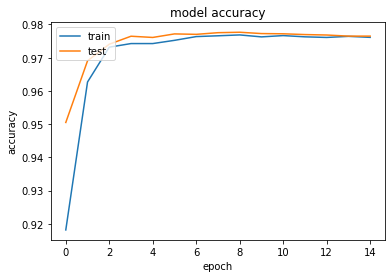

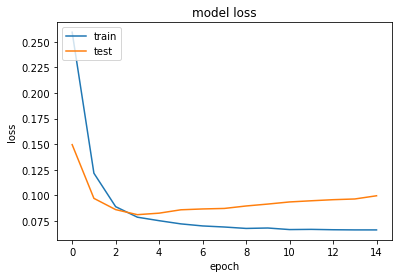

In [29]:
# Dibujo las gráficas de la evolución de las evaluaciones por cada epoch
# El naranja corresponde a los valores del test y el azul al train

# Accuracy (Precisión)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# Loss (Pérdida)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [30]:
model.save('/home/usr_1ctdiazfranciscojavier_gmail/MODELO_FINAL')

INFO:tensorflow:Assets written to: /home/usr_1ctdiazfranciscojavier_gmail/MODELO_FINAL/assets


In [31]:
# Importo los datos de mi dataset para evaluarlo
data_test = pd.read_csv('/home/usr_1ctdiazfranciscojavier_gmail/Test.txt',sep=';',encoding='latin-1', decimal=",")

In [32]:
# Lo visualizo
data_test.head()

,ID,Calle,Localización,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Construcción viviendas pública,Propietario,Alarma
0,e54b5ef5-7898-4c24-b5fd-e9e62a0e5c6e,C/ Monroy,Carabanchel,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0,37.0,Particular,0
1,705475c2-1fc5-4b23-bdaf-1c90a2f29759,C/ Gil De Santivañes,Salamanca,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0,0.0,Particular,0
2,21a59139-7c32-4cf7-b044-d066777fb1ca,C/ Zarapitos,Carabanchel,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0,37.0,Banco,1
3,9282c36c-f768-4d66-9c70-faf5e96d34af,C/ Zarapitos,Barajas,50158,2420.0,95.0,0.001894,1850,17641.0,5075.0,3.0,Particular,0
4,01341f25-88ea-4a9a-8adc-2949f05e6dbe,C/ Cebreros,Moncloa-Aravaca,122164,5227.0,281.0,0.002300,4725,22152.0,13796.0,0.0,Ayuntamiento,0


In [33]:
#Selecciono las variables importantes para predecir
columns_to_extract2 = ['Calle','Localización',	'Habitantes','Paro_registrado','N_detenciones',
                      'Detenciones/Habitantes','Viviendas vacías','Renta media por persona',
                      'N_extranjeros', 'Propietario',
                      'Alarma']

In [34]:
#Creo un dataframe con las variables con las que voy a predecir
test_features = data_test[columns_to_extract2]
#Muestro las 5 primeras filas por pantalla
test_features.head()

,Calle,Localización,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Propietario,Alarma
0,C/ Monroy,Carabanchel,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0,Particular,0
1,C/ Gil De Santivañes,Salamanca,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0,Particular,0
2,C/ Zarapitos,Carabanchel,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0,Banco,1
3,C/ Zarapitos,Barajas,50158,2420.0,95.0,0.001894,1850,17641.0,5075.0,Particular,0
4,C/ Cebreros,Moncloa-Aravaca,122164,5227.0,281.0,0.002300,4725,22152.0,13796.0,Ayuntamiento,0


In [35]:
# Voy a coger por separado las variables numéricas y las categóricas para tratarlas más fácilmente
# Creo el dataframe de las variables numéricas -->  var_num
var_t = ['Habitantes','Paro_registrado','N_detenciones',
       'Detenciones/Habitantes','Viviendas vacías','Renta media por persona',
       'N_extranjeros']
var_num_t=test_features[var_t]
var_num_t.head()

,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros
0,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0
1,148405,6034.0,728.0,0.004905,13140,24433.0,21481.0
2,261118,20481.0,643.0,0.002462,12145,10872.0,55362.0
3,50158,2420.0,95.0,0.001894,1850,17641.0,5075.0
4,122164,5227.0,281.0,0.002300,4725,22152.0,13796.0


In [36]:
# Creo el dataframe de las variables categóricas -->  var_cat
var2_t = ['Calle','Localización','Propietario','Alarma']
var_cat_t=test_features[var2_t]
var_cat_t.head()

,Calle,Localización,Propietario,Alarma
0,C/ Monroy,Carabanchel,Particular,0
1,C/ Gil De Santivañes,Salamanca,Particular,0
2,C/ Zarapitos,Carabanchel,Banco,1
3,C/ Zarapitos,Barajas,Particular,0
4,C/ Cebreros,Moncloa-Aravaca,Ayuntamiento,0


In [37]:
#Normalizo los valores de las variables numéricas
var_num_t = norm(var_num_t)

#Muestro el resultado para comprobar que lo ha normalizado
var_num_t.head()

,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros
0,1.000000,0.916569,0.302213,0.123018,0.911869,0.089115,1.000000
1,0.465714,0.183405,0.348084,0.313141,1.000000,0.907325,0.326247
2,1.000000,0.916569,0.302213,0.123018,0.911869,0.089115,1.000000
3,0.000000,0.000000,0.006476,0.078777,0.000000,0.497526,0.000000
4,0.341325,0.142451,0.106854,0.110387,0.254650,0.769700,0.173425


In [38]:
# Optimizo las variables categóricas con la función get_dummies, con la que asigna 0 o 1 en las casillas correspondientes
var_cat_t = pd.get_dummies(var_cat_t, columns=['Alarma'] ,drop_first=True)

# Hago lo mismo con la variable -- Localización -- pero a parte porque al tener 21 entradas, no se podía dejar en una sola columna
var_cat_t = pd.get_dummies(var_cat_t, columns=['Calle','Localización','Propietario'])

#Muestro el resultado
var_cat_t.head()

,Alarma_1,Calle_C/ Agosto,Calle_C/ Aguacate,Calle_C/ Aguilar De Campoo,Calle_C/ Albaricoque,Calle_C/ Albatros,Calle_C/ Albert Camus,Calle_C/ Alberto Bosch,Calle_C/ Alcalde Luis Marichalar,Calle_C/ Alcalde Martin De Alzaga,...,Localización_Salamanca,Localización_San Blas-Canillejas,Localización_Tetuán,Localización_Usera,Localización_Vicálvaro,Localización_Villa de Vallecas,Localización_Villaverde,Propietario_Ayuntamiento,Propietario_Banco,Propietario_Particular
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#Uno los 2 dataframes de variables (categóricas y numéricas)
test_features = pd.concat([var_num_t,var_cat_t],axis=1,sort=False)
test_features.head()

,Habitantes,Paro_registrado,N_detenciones,Detenciones/Habitantes,Viviendas vacías,Renta media por persona,N_extranjeros,Alarma_1,Calle_C/ Agosto,Calle_C/ Aguacate,...,Localización_Salamanca,Localización_San Blas-Canillejas,Localización_Tetuán,Localización_Usera,Localización_Vicálvaro,Localización_Villa de Vallecas,Localización_Villaverde,Propietario_Ayuntamiento,Propietario_Banco,Propietario_Particular
0,1.000000,0.916569,0.302213,0.123018,0.911869,0.089115,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.465714,0.183405,0.348084,0.313141,1.000000,0.907325,0.326247,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.000000,0.916569,0.302213,0.123018,0.911869,0.089115,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.000000,0.006476,0.078777,0.000000,0.497526,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.341325,0.142451,0.106854,0.110387,0.254650,0.769700,0.173425,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
print(len(test_features.columns))
print(len(test_features))

501
500


In [41]:
tam = vector_size-len(test_features.columns)
cont=0
while cont<tam:
  name = 'Calle_'+ str(cont)
  test_features.insert(0,name,0, allow_duplicates=False)
  cont+=1

In [42]:
len(test_features.columns)

8225

In [43]:
test_features

,Calle_7723,Calle_7722,Calle_7721,Calle_7720,Calle_7719,Calle_7718,Calle_7717,Calle_7716,Calle_7715,Calle_7714,...,Localización_Salamanca,Localización_San Blas-Canillejas,Localización_Tetuán,Localización_Usera,Localización_Vicálvaro,Localización_Villa de Vallecas,Localización_Villaverde,Propietario_Ayuntamiento,Propietario_Banco,Propietario_Particular
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [44]:
# test_features.to_csv('test_procesado.txt', index=False)

In [45]:
# Realizo las predicciones de mi test
predictions = model.predict(test_features)

In [46]:
# Imprimo los resultados de las predicciones
print(predictions)

[[4.27649566e-20]
 [9.51528183e-15]
 [9.53930538e-15]
 [1.72574566e-09]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.12279164e-21]
 [3.43101349e-17]
 [1.20238699e-08]
 [1.00000000e+00]
 [1.72332873e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99609113e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.69790675e-11]
 [5.37645735e-15]
 [9.48099971e-01]
 [9.80605808e-16]
 [9.99526186e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.31429963e-15]
 [3.37945731e-17]
 [1.99518015e-16]
 [3.04705886e-13]
 [1.00000000e+00]
 [2.72249497e-15]
 [2.52931102e-17]
 [1.64696663e-16]
 [1.00000000e+00]
 [1.19619517e-15]
 [6.71644876e-16]
 [1.00000000e+00]
 [4.47952836e-18]
 [9.16985585e-11]
 [3.44591061e-19]
 [2.23259914e-28]
 [1.00000000e+00]
 [2.60128572e-21]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.21913043e-11]
 [7.66967323e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.99887473e-15]
 [1.00000000e+00]
 [1.22151553e-15]
 [2.48166644e-14]
 [6.683217

In [47]:
# Redondeo los resultados para que sean 1 (Ocupada) y 0 (NO ocupada)

# Lista donde almacenaré mis predicciones
out = []
for i in predictions:
  # Como los resultados son tan próximos a uno, establezco mi umbral en 0.7 y me quedo con los más cercanos a 1
  if i>=0.7:
    out.append(1)
  else:
    out.append(0)

In [48]:
# Creo un dataframe con el ID de cada vivienda, su calle y localización, y el resultado de si va a ser ocupada
result = pd.concat([data_test['ID'],data_test['Calle'],data_test['Localización'],pd.DataFrame(data=out,columns=['Ocupada'])],axis=1,sort=False)

In [49]:
# Muestro el resultado para comprobarlo
result

,ID,Calle,Localización,Ocupada
0,e54b5ef5-7898-4c24-b5fd-e9e62a0e5c6e,C/ Monroy,Carabanchel,0
1,705475c2-1fc5-4b23-bdaf-1c90a2f29759,C/ Gil De Santivañes,Salamanca,0
2,21a59139-7c32-4cf7-b044-d066777fb1ca,C/ Zarapitos,Carabanchel,0
3,9282c36c-f768-4d66-9c70-faf5e96d34af,C/ Zarapitos,Barajas,0
4,01341f25-88ea-4a9a-8adc-2949f05e6dbe,C/ Cebreros,Moncloa-Aravaca,1
...,...,...,...,...
495,54dc6fc2-7fe0-44b4-86f7-fb56bfe02128,C/ Plaza Carros,Arganzuela,0
496,b66e0c3f-cb22-44ae-b186-19ad9bb33b2d,C/ Carcastillo,Carabanchel,1
497,bf8c0af4-4a32-41b5-b52e-e227bc5003ef,C/ Jose Calvo,Tetuán,0
498,d3a631f2-88af-4164-846f-cca2f806bbcd,C/ E (El Salobral),Villaverde,1


In [50]:
# Guardo el dataframe resultante en un csv
result.to_csv('result2.txt', index=False)